In [3]:
import pandas as pd
from long_lat_multifamily_la2 import longitude_latitude_dict

In [9]:
# # Check the structure of longitude_latitude_dict
# print("Sample entry from longitude_latitude_dict:")
# sample_key = next(iter(longitude_latitude_dict))
# print(f"Key: {sample_key}")
# print(f"Value: {longitude_latitude_dict[sample_key]}")

# # Filter out entries where either longitude or latitude is None
# filtered_longitude_latitude_dict = {}
# for location, coords in longitude_latitude_dict.items():
#     # Check if coords is a list with two elements and neither is None
#     if isinstance(coords, list) and len(coords) == 2 and coords[0] is not None and coords[1] is not None:
#         filtered_longitude_latitude_dict[location] = coords

# # Print statistics about the filtering
# print(f"Original dictionary size: {len(longitude_latitude_dict)}")
# print(f"Filtered dictionary size: {len(filtered_longitude_latitude_dict)}")
# print(f"Removed {len(longitude_latitude_dict) - len(filtered_longitude_latitude_dict)} entries with None values")

# # Replace the original dictionary with the filtered one
# longitude_latitude_dict = filtered_longitude_latitude_dict

# len(longitude_latitude_dict)

Sample entry from longitude_latitude_dict:
Key: 11418 Missouri Avenue    Los Angeles, CA 90025
Value: [34.0411288, -118.4470615]
Original dictionary size: 2678
Filtered dictionary size: 2678
Removed 0 entries with None values


2678

In [15]:


# Read in the project_dates.csv file
project_dates = pd.read_csv('project_dates.csv')

# Display the first few rows to verify the data was loaded correctly
print("Project dates dataframe loaded with shape:", project_dates.shape)
project_dates.head()

# Filter to keep only projects where location is already in the longitude_latitude_dict
filtered_projects = project_dates[project_dates['location'].isin(longitude_latitude_dict.keys())]

# Display the number of projects kept
print(f"Total projects: {len(project_dates)}")
print(f"Projects with location already in dictionary: {len(filtered_projects)}")
print(f"Projects not in dictionary (filtered out): {len(project_dates) - len(filtered_projects)}")

# Update the project_dates dataframe to only include projects in the dictionary
project_dates = filtered_projects.reset_index(drop=True)


Project dates dataframe loaded with shape: (3803, 3)
Total projects: 3803
Projects with location already in dictionary: 2716
Projects not in dictionary (filtered out): 1087


In [16]:
project_dates

,project,location,earliest_date
0,af1c9174_11418-w-missouri-avenue,"11418 Missouri Avenue Los Angeles, CA 90025",2025-01-27
1,27824e27_1408-w-jefferson-boulevard,"1408 West Jefferson Boulevard Los Angeles, ...",2024-01-12
2,faf5804c_landmark-two,"11750 Wilshire Blvd Los Angeles, CA 90025",2013-12-05
3,c8edeef6_520-534-n-glendale-ave,"520 North Glendale Avenue Glendale, CA 91206",2022-04-12
4,d7e88265_1414-n-las-palmas-avenue,"1414 N Las Palmas Avenue Los Angeles, CA 90028",2020-04-11
...,...,...,...
2711,710daebb_937-pine-ave,"937 Pine Avenue Long Beach, CA 90813",2022-10-20
2712,b922b678_10505-washington-boulevard,"10505 Washington Boulevard Culver City, CA ...",2023-06-15
2713,f064f9ad_3647-hughes-avenue,"3647 Hughes Avenue Los Angeles, CA 90034",2016-11-08
2714,29145332_ambrose-apartments-1615-montana,"1615 Montana Street Los Angeles, CA 90026",2019-03-14


In [17]:
# Check for duplicate locations in the project_dates dataframe
duplicate_locations = project_dates['location'].duplicated(keep=False)
print(f"Number of duplicate locations: {duplicate_locations.sum()}")

if duplicate_locations.sum() > 0:
    # Display the duplicate locations
    print("\nDuplicate locations found:")
    duplicate_df = project_dates[duplicate_locations].sort_values('location')
    display(duplicate_df)
    
    # Remove all duplicates (both first and subsequent occurrences)
    project_dates = project_dates[~duplicate_locations].reset_index(drop=True)
    print(f"\nAfter removing all duplicates, dataframe shape: {project_dates.shape}")

# Verify no duplicates remain
assert project_dates['location'].duplicated().sum() == 0, "Duplicates still exist in the dataframe"
print("Successfully removed all duplicate locations.")


Number of duplicate locations: 67

Duplicate locations found:


,project,location,earliest_date
1233,d138f28a_affordable-student-housing-phase-4-an...,"1000 E. Victoria Street Carson, CA 90747",2023-06-05
2107,0a2138d3_csu-dominguez-hills-science-innovatio...,"1000 E. Victoria Street Carson, CA 90747",2017-10-03
34,78ea12ad_west-la-va-building-402,"11301 Wilshire Boulevard Los Angeles, CA 90073",2022-11-02
928,fd6bc2e3_north-va-campus-building-402,"11301 Wilshire Boulevard Los Angeles, CA 90073",2023-07-05
1520,84a8623a_west-la-va-building-404,"11301 Wilshire Boulevard Los Angeles, CA 90073",2023-02-14
...,...,...,...
1365,4857d7e5_959-e-stadium-way,"959 Stadium Way Los Angeles, CA 90012",2023-03-15
2710,c2107d40_stadium-villas,"959 Stadium Way Los Angeles, CA 90012",2018-07-03
600,309d53cf_6500-sepulveda-boulevard,"N Sepulveda Blvd Los Angeles, CA 90049",2016-11-17
1221,6a5cd97e_mission-gateway,"N Sepulveda Blvd Los Angeles, CA 90049",2016-08-03



After removing all duplicates, dataframe shape: (2649, 3)
Successfully removed all duplicate locations.


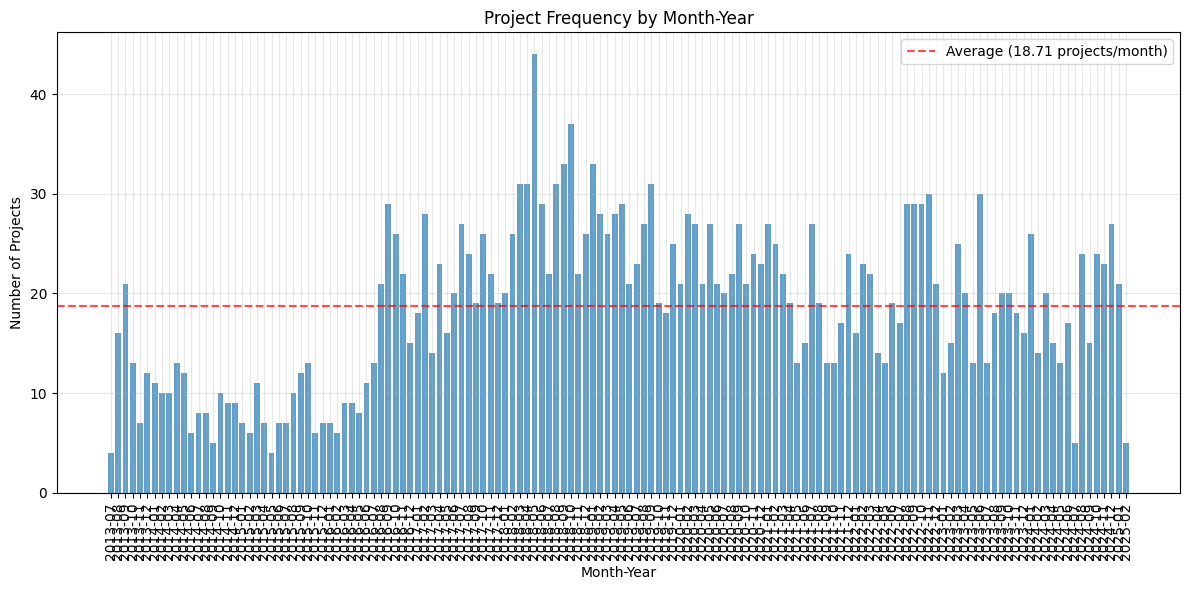

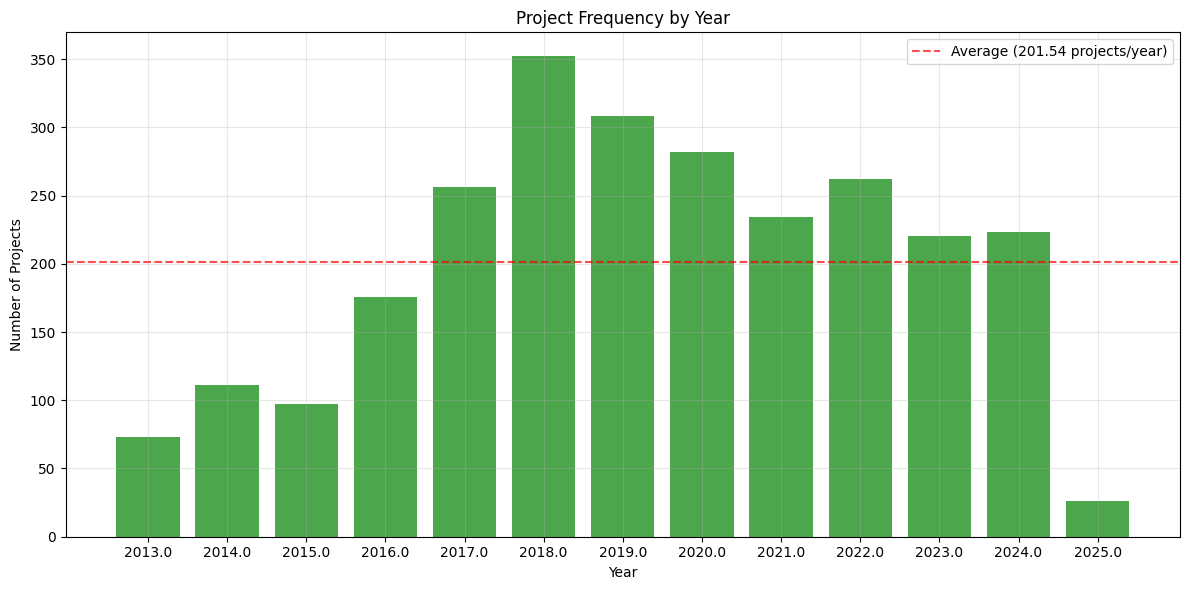

,project,location,earliest_date,month_year,year
0,af1c9174_11418-w-missouri-avenue,"11418 Missouri Avenue Los Angeles, CA 90025",2025-01-27,2025-01,2025.0
1,27824e27_1408-w-jefferson-boulevard,"1408 West Jefferson Boulevard Los Angeles, ...",2024-01-12,2024-01,2024.0
2,faf5804c_landmark-two,"11750 Wilshire Blvd Los Angeles, CA 90025",2013-12-05,2013-12,2013.0
3,c8edeef6_520-534-n-glendale-ave,"520 North Glendale Avenue Glendale, CA 91206",2022-04-12,2022-04,2022.0
4,d7e88265_1414-n-las-palmas-avenue,"1414 N Las Palmas Avenue Los Angeles, CA 90028",2020-04-11,2020-04,2020.0
...,...,...,...,...,...
2644,710daebb_937-pine-ave,"937 Pine Avenue Long Beach, CA 90813",2022-10-20,2022-10,2022.0
2645,b922b678_10505-washington-boulevard,"10505 Washington Boulevard Culver City, CA ...",2023-06-15,2023-06,2023.0
2646,f064f9ad_3647-hughes-avenue,"3647 Hughes Avenue Los Angeles, CA 90034",2016-11-08,2016-11,2016.0
2647,29145332_ambrose-apartments-1615-montana,"1615 Montana Street Los Angeles, CA 90026",2019-03-14,2019-03,2019.0


In [21]:
import matplotlib.pyplot as plt

# Convert earliest_date to datetime format
project_dates['earliest_date'] = pd.to_datetime(project_dates['earliest_date'])

# Extract month and year from earliest_date
project_dates['month_year'] = project_dates['earliest_date'].dt.to_period('M')

# Count the frequency of each month-year
date_counts = project_dates['month_year'].value_counts().sort_index()

# Create a bar plot of the frequency by month-year
plt.figure(figsize=(12, 6))
plt.bar(date_counts.index.astype(str), date_counts.values, alpha=0.7)
plt.title('Project Frequency by Month-Year')
plt.ylabel('Number of Projects')
plt.xlabel('Month-Year')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)

# Add a reference line for the average
avg_projects = date_counts.mean()
plt.axhline(y=avg_projects, color='r', linestyle='--', alpha=0.7, 
            label=f'Average ({avg_projects:.2f} projects/month)')
plt.legend()

plt.tight_layout()
plt.show()

# Also create a plot by year
# Extract year from earliest_date
project_dates['year'] = project_dates['earliest_date'].dt.year

# Count the frequency of each year
year_counts = project_dates['year'].value_counts().sort_index()

# Create a bar plot of the frequency by year
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index.astype(str), year_counts.values, alpha=0.7, color='green')
plt.title('Project Frequency by Year')
plt.ylabel('Number of Projects')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)

# Add a reference line for the average
avg_projects_per_year = year_counts.mean()
plt.axhline(y=avg_projects_per_year, color='r', linestyle='--', alpha=0.7, 
            label=f'Average ({avg_projects_per_year:.2f} projects/year)')
plt.legend()

plt.tight_layout()
plt.show()

# Display the dataframe as well
project_dates

In [22]:
# Filter projects from 2014 to 2020 (inclusive)
filtered_projects = project_dates[(project_dates['year'] >= 2014) & (project_dates['year'] <= 2020)]

# Display the count of filtered projects
print(f"Number of projects from 2014 to 2020: {len(filtered_projects)}")

# Display the filtered dataframe
filtered_projects


Number of projects from 2014 to 2020: 1582


,project,location,earliest_date,month_year,year
4,d7e88265_1414-n-las-palmas-avenue,"1414 N Las Palmas Avenue Los Angeles, CA 90028",2020-04-11,2020-04,2020.0
5,3a56dc43_1707-cloverfield,"1707 Cloverfield Blvd Santa Monica, CA 90404",2018-08-06,2018-08,2018.0
8,f98fc467_1600-1616-e-florence-avenue,"1600 Florence Ave Los Angeles, CA 90001",2016-10-14,2016-10,2016.0
10,a89d0157_1043-1049-s-harvard-boulevard,"1043 S Harvard Blvd Los Angeles, CA 90006",2020-02-05,2020-02,2020.0
12,a454a24e_1437-6th-street-santa-monica,"1437 6th St Santa Monica, CA 90401",2020-01-27,2020-01,2020.0
...,...,...,...,...,...
2640,20cc4e07_3846-bentley-avenue,"3846 Bentley Avenue Culver City, CA 90232",2019-09-22,2019-09,2019.0
2641,e374e0f1_blossom-plaza-900-n-broadway,"900 North Broadway Los Angeles, CA 90012",2014-02-10,2014-02,2014.0
2642,f2e13a5e_metamorphosis-on-foothill,"13574 Foothill Blvd Los Angeles, CA 91342",2019-10-16,2019-10,2019.0
2646,f064f9ad_3647-hughes-avenue,"3647 Hughes Avenue Los Angeles, CA 90034",2016-11-08,2016-11,2016.0
